# Code-along 2025-01-15 Build an AI Movie Night Recommendation Tool (Edited by Anna Lau)


Note by Anna Lau (30 March 2025):
This notebook and dataset are obtained from datacamp.
It is a code-along project on datacamp.
The python code is my own code.
I have compared my solution with the one on datacamp.
I have indicated the code that DataCamp did better than I did, with comments in the code. In addition, the code-along series uses AI promptsto generate the codes, which explains why there are a few note on prompts in the code. However, I typed my own code instead of relying on AI.

In this code-along, we will be building an AI Movie Night Recommendation Tool!

To do this, we will be using two data sets:
- Movies metadata: A data set containing metadata of about 9000 movies (title, description, etc.)
- User ratings: A data set containing ratings of how much someone liked a movie.

We will be building towards our end goal by covering the following tasks:
- Understanding the data set by doing some basic exploratory analysis
- Building a first recommender based on movie popularity or movie ratings
- Personalising recommendations by exploiting user ratings
- Leveraging LLMs to calculate similarity between movies
- Generating a recommendation by writing what kind of movies you'd like to see
- Putting it all together into one single recommendation tool

This code-along is aimed at anyone just starting to code by showing how you can build something useful by simply writing prompts to analyse data sets. The code generated is sufficiently challenging, however, for the more seasoned data person to play around with.

## Task 1: Import the ratings and movie metadata and explore it.

The data is contained in two CSV files named `movies_metadata.csv` and `ratings.csv`

`movies_metadata` contains the following columns:

- `movie_id`: Unique identifier of each movie.
- `title`: Title of the movie.
- `overview`: Short description of the movie.
- `vote_average`: Average score the movie got.
- `vote_count`: Total number of votes the movie got.

`ratings` contains the following columns:

- `user_id`: Unique identifier of the person who rated the movie.
- `movie_id`: Unique identifier of the movie.
- `rating`: Value between 0 and 10 indicating how much the person liked the movie.

In [11]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.7 MB 13.4 MB/s eta 0:00:01
   -------------- ------------------------- 3.1/8.7 MB 10.8 MB/s eta 0:00:01
   ------------------- -------------------- 4.2/8.7 MB 9.0 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 12.1 MB/s eta 0:00:00

   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   --

In [25]:
!pip install sentence-transformers

   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.3 MB 25.4 MB/s eta 0:00:01
   ------------- -------------------------- 3.9/11.3 MB 8.7 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.3 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------  11.0/11.3 MB 13.2 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 12.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/561.5 kB ? eta -:--:--
   --------------------------------------- 561.5/561.5 kB 18.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   ------------------------------------- -- 2.4/2.5 MB 11.2 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 10.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/241.3 MB ? eta -:--:--
   ---------------------------------------- 1.3/241.3 MB 33.8 MB/s eta 0:00:08
    -----------

In [26]:
# import library for pandas for manipulating data
# impmort matplotlib.pyplot and seaborn for data visualization

import pandas as pd
# import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [27]:
# read the movies_metadata and rating file
movies_metadata = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings.csv')

In [28]:
# Step
# count how many unique movies there are in movie_metadata
unique_movies = movies_metadata['movie_id'].nunique()
print(f"Number of unique movies in movie_metadata:{unique_movies}")

# count how many unique users and how many uniqe movies are rated in dataset 'rating'
unique_users = ratings['user_id'].nunique()
unique_rated_movies = ratings['movie_id'].nunique()
print(f"Number of unique users: {unique_users}")
print(f"Number of unique rated movies: {unique_rated_movies}")
# Findings: the number of movies in both data sets are the same, and we have data from 671 users.


Number of unique movies in movie_metadata:9010
Number of unique users: 671
Number of unique rated movies: 9010


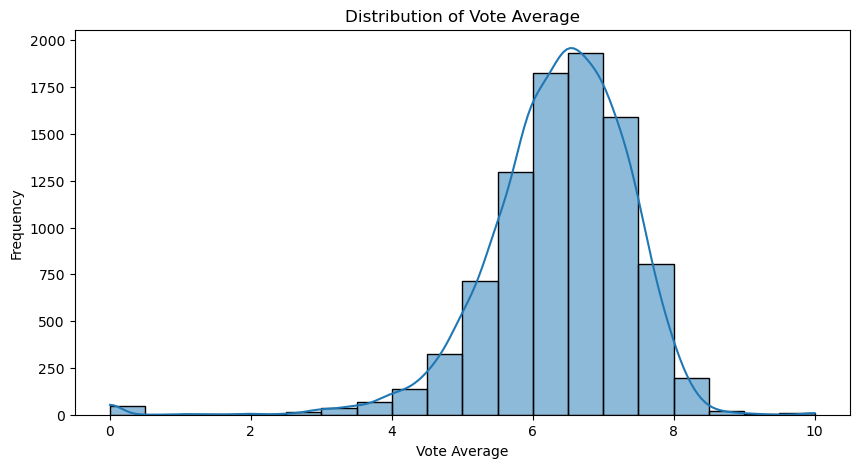

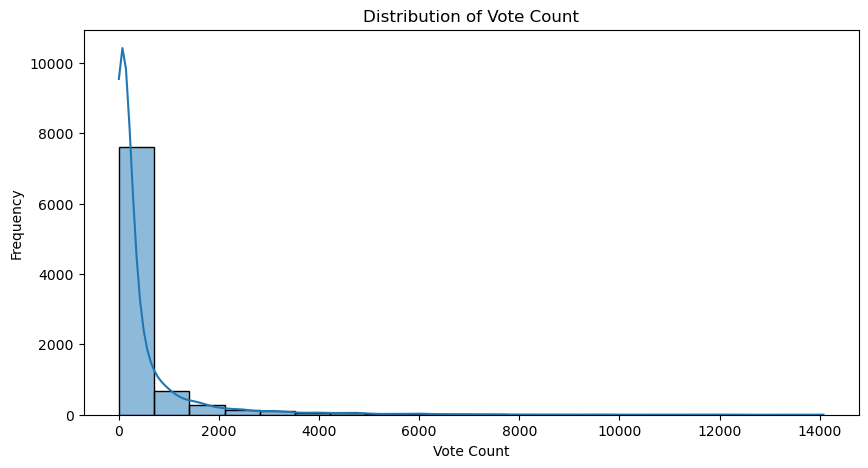

In [29]:
# In the metadate data set, vote_counting indicates how many ratings a movie has received.
# vote_average indicates the average rating for a movie.
# Exlpore the distribution of both fields with visualization (histogram)
# Visualize the vote_average column


# plt.figure(figsize=(10,5))
# #figure(): This function creates a new figure for plotting.  figsize=(10,5): This argument specifies the size of the figure in inches.
# sns.histplot(movies_metadata['vote_average'], bins = 20, kde = True)
# plt.title('Distribution of Vote Average')
# plt.xlabel('Vote Average')
# plt.ylabel('Frequency')
# plt.show()

# #Visualise the vote_count column
# plt.figure(figsize=(10,5))
# sns.histplot(movies_metadata['vote_count'], bins=20, kde=True)
# plt.title('Distribution of Vote Count')
# plt.xlabel('Vote Count')
# plt.ylabel('Frequency')
# plt.show()



#Findings:
# The vote averages are centered around 7 with slightly more movies lower than 7 compared to higher than 7.
# In the vote count distribution, many movies don't receive many ratings, and a few movies received a lot of ratings.

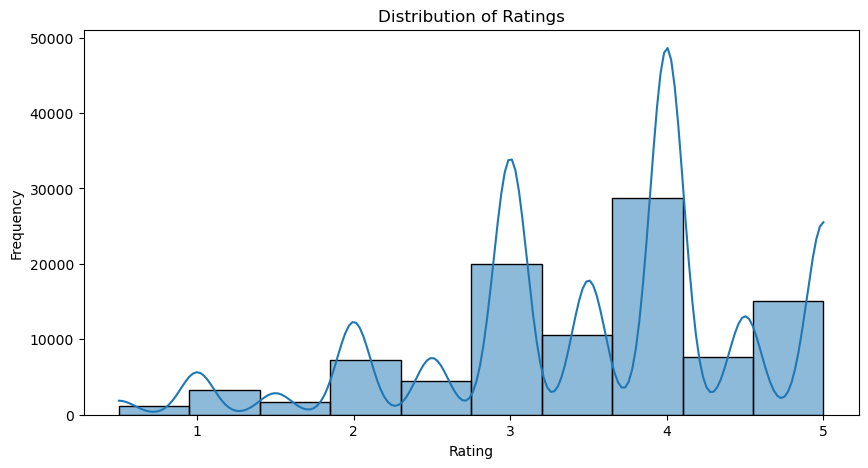

In [30]:
# Explore distribution of rating given by users in dataset ratings with histogram
# Visualise the distribution of the raing column


# plt.figure(figsize = (10, 5))
# # sns.histplot(ratings['rating'], bins = 10, kde = True)
# sns.histplot(ratings['rating'], bins = 10, kde = True)
# plt.title('Distribution of Ratings')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()


# Findings: the rating is a scale between 0.5 - 5 instead of 1-10.
# Datacamp comment: "It is clear people are biase towards giving "full" scores rather than including half points."

## Task 2: Simple recommender based on popularity or highest rating

In short, a recommender is any system that generates suggestions for an end user.

We will start with creating the simplest recommender, one that ranks all movies according to the highest average score, or the highest number of votes.

This kind of recommender generates the same output for anyone using it.

In [31]:
# define a function with three arguements:input dataset, criterion, top_n (which allows you specific the number of movies in the recommedation)

def simple_recommender(movies_metadata, criterion = 'vote_average', top_n=10):

    #Improvement on code by Datacamp
    #check the criterion agrument; it could only take two values: vote_average and vote_count; otherwise, raise an error
    if criterion not in ['vote_average', 'vote_count']:
        raise ValueError("Criterion must be either 'vote_average' or 'vote_count'")

    # sort the movies by the criterion
    recommeded_movies = movies_metadata.sort_values(by=criterion, ascending = False)

    # take the number of recommended movies as specificed by top_n
    top_recomended_movies = recommeded_movies.head(top_n)

    # return those top_n recommended movies
    #original
    #return top_recomended_movies
    #improvement by Datacamp
    return top_recomended_movies[['movie_id','title', 'overview', criterion]]

In [32]:
# Copied from datacamp code to test the function
# Example usage:
top_movies_by_average = simple_recommender(movies_metadata, criterion='vote_average', top_n=10)
top_movies_by_count = simple_recommender(movies_metadata, criterion='vote_count', top_n=10)

# Display the top recommended movies
top_movies_by_average
top_movies_by_count

,movie_id,title,overview,vote_count
67,1375666.0,Inception,"Cobb, a skilled thief who commits corporate es...",14075.0
5577,468569.0,The Dark Knight,Batman raises the stakes in his war on crime. ...,12269.0
5761,499549.0,Avatar,"In the 22nd century, a paraplegic Marine is di...",12114.0
8033,848228.0,The Avengers,When an unexpected enemy emerges and threatens...,12000.0
6935,1431045.0,Deadpool,Deadpool tells the origin story of former Spec...,11444.0
278,816692.0,Interstellar,Interstellar chronicles the adventures of a gr...,11187.0
6711,1853728.0,Django Unchained,"With the help of a German bounty hunter, a fre...",10297.0
1360,2015381.0,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",10014.0
7828,137523.0,Fight Club,A ticking-time-bomb insomniac and a slippery s...,9678.0
4484,1392170.0,The Hunger Games,Every year in the ruins of what was once North...,9634.0


## Task 3: Generate recommendations based on user ratings

We already created a very simple first recommender, but we haven't touched our user data yet! How can this help us?
When you watched a movie you liked, you might want to learn which other movies other users liked that also watched that movie.
This is where the user data comes in. We can use the ratings to infer which movies are similar to a movie you have already watched!

In [56]:
# Goal: incoporate other users's rating when providing recommendation. Rating similar to the selected movie will be considered in giving the recommedation.

import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Merge the dataset 'ratings' and 'movies_metadata'
movies_ratings = pd.merge(ratings, movies_metadata, on = 'movie_id')
# movies_ratings.head(10)

# Improvement suggested by datacamp
# "We currently have a very long data set, where each row is a combination of user, movie, and a rating.
# The recommendation we will be creating however, is a similarity of ratings between movies, so we need a data representation where each movie is its own column,
#and each user is its own row. This is achieved by pivoting the table to a user x movie representation."
# Create a pivot table with users as rows and movies as columns
user_movie_ratings = movies_ratings.pivot_table(index='user_id', columns='title', values='rating')
# user_movie_ratings.head(10)

# Fill NaN values with 0 (assuming unrated movies have a rating of 0)
user_movie_ratings = user_movie_ratings.fillna(0)

# Apply cosine_similarity function to our dataset
# Note from datacamp
# What this boils down to is that for each pair of columns (movies) we will compute how similar the ratings are.
# If all ratings are the same between two movies, they are highly similar (if not the same) and if you would ask for a recommendation based on one of these two movies
#we would definitely recommend the other. Vice versa, if all ratings were opposite between two movies, we would almost never recommend one based on the other.
# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(user_movie_ratings.T)
# Create a DataFrame for the cosine similarity matrix
cosine_sim_df = pd.DataFrame(cosine_sim, index=user_movie_ratings.columns, columns=user_movie_ratings.columns)
cosine_sim_df.head(5)


# Define a function
# First, take the column that is equal to the movie title
# Next, the values are sorted according to their similariy score.
# Finally, take the top_n movies in the list.
# Note from datacamp: " we index from 1:num_recommendations+1 - why?
# The movie that is most similar in terms of ratings is the movie itself!
# So we discard that by not taking the movie with index 0.""

def get_recommendations(movie_title, cosine_sim_df, num_recommendations = 10):
  # get the similarity scores for the selected movie_title
  sim_scores = cosine_sim_df[movie_title]

  # sort the movies based on the similarity scores
  sim_scores = sim_scores.sort_values(ascending = False)

  # Get the top_n recommendation, excluding the movie itself (with similarity score = 1)
  top_recommendations = sim_scores.iloc[1:num_recommendations + 1]

  return top_recommendations



In [57]:
# Copied from datacamp to test the funcation
# Example usage
movie_title = "The Godfather"  # Replace with the movie title you want recommendations for
recommendations = get_recommendations(movie_title, cosine_sim_df)
recommendations

title
The Godfather: Part II             0.773685
GoodFellas                         0.620349
One Flew Over the Cuckoo's Nest    0.568244
American Beauty                    0.557997
Star Wars                          0.546750
Raiders of the Lost Ark            0.538185
Saving Private Ryan                0.534684
Apocalypse Now                     0.534347
Reservoir Dogs                     0.531713
The Usual Suspects                 0.530727
Name: The Godfather, dtype: float64

## Task 4: Generate embeddings based on the movie descriptions

So far, we already created two recommenders! One that didn't take into account your preferences, and one that suggested movies based on similarity to a movie you already saw. Now, we will get creative and let you write a summary of the kind of move you'd like to watch to get recommendations back!

In order to do this, we will rely on a concept called *embeddings*. In a nutshell, embeddings are numerical representations of a piece of text and they are critical to the success of the most recent generation of AI models, like ChatGPT. We will take the description of our movies and convert these to their embedded form.

In [35]:
# Anna: for this task, the code follows datacamp as this is my first LLM project.
# Goal: use library sentence_transformer; transform a sentence into numbers called sentence embeddings
# Then quantify how similar each movie description is to all other movie descriptions

The most important library we are using in this task is called `sentence_transformers`.

Very shortly put, a sentence transformer is a type of LLM that allows us to** transform a sentence into a numerical representation.

**For example, the sentence "I have a dog." can be transformed into a representation of numbers and these numbers have an interesting property.** The closer they are together, the more semantically similar they are. These numbers are called sentence embeddings, and we can use them to **quantify how similar each movie description is to all other movie descriptions.**


More interestingly however, we can then compare arbitrary sentences with each movie and compute how similar that one sentence is tot each movie (but that's for the next task!).  

In [36]:
# Note from datacamp
#This line simply loads a transformer model, of which there consist many.
#This one is relatively small which means you don't need a sophisticated machine to run it on.
#The downside is that the result won't be as impressive as with LLMs like ChatGPT.
from sentence_transformers import SentenceTransformer
import pandas as pd
from tqdm import tqdm
# Load a pre-trained model from Sentence Transformers
model = SentenceTransformer('all-MiniLM-L6-v2')


#Make sure all movie descriptions have no missng values
#.fillna(''): This method replaces any NaN values in the 'overview' column with an empty string ('')
movies_metadata['overview'] = movies_metadata['overview'].fillna('').astype(str)
#Then apply model.encode() to each row of the data frame to generate an embedding of each description
tqdm.pandas(desc="Generating embeddings")
movies_metadata['embedding'] = movies_metadata['overview'].progress_apply(lambda x: model.encode(x).tolist())


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

C:\Users\annah\AppData\Local\anaconda3\envs\py3_12\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\annah\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Generating embeddings: 100%|██████████| 9010/9010 [08:03<00:00, 18.62it/s]


## Task 5: Use embedding simillarity to generate recommendations

Now we are ready to create a new recommender function where we submit a description of a movie we want to watch and get recommendations back.

In [37]:
# import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Define a function
def recommend_movies(user_input, movies_metadata, model, top_n = 5):

    # Create an embedding of the input text
    user_embedding = model.encode(user_input).tolist()

    # Calculate the similarity between input text embedding and the embedding of all movies
    # need to revisit
    movies_metadata['similarity'] = movies_metadata['embedding'].apply(lambda x: cosine_similarity([user_embedding], [x])[0][0])

    # Sort based on those similarity values and select top_n
    # Return a subset of the data set with the movie title and description
    top_movies = movies_metadata.sort_values(by='similarity', ascending=False).head(top_n)

    return top_movies[['title', 'overview', 'similarity']]


In [38]:
#Copied from datacamp to test the function
# Example usage
user_input = "A story about a young wizard who discovers his magical heritage."
top_n = 5
recommended_movies = recommend_movies(user_input, movies_metadata, model, top_n)
recommended_movies

,title,overview,similarity
5579,The Wizard of Oz,Young Dorothy finds herself in a magical world...,0.516829
2556,Stardust,In a countryside town bordering on a magical l...,0.458553
7106,The Illusionist,"Scotland, late 1950s. A struggling illusionist...",0.455771
6378,The Raven,A magician who has been turned into a raven tu...,0.453578
5075,August Rush,"A drama with fairy tale elements, where an orp...",0.443685


## Task 6: Put it all together into a single function

In this final task, we will be putting all previous recommenders together into one single function that will allow you to generate an awesome movie night!


Combine the three different recommenders we used before, the first one being a recommender based on vote_average or vote_count, the second one based on the ratings data where the most similar movies would be returned for a given movie title, and the third one being a recommender based on the movie embeddings that are most similar to a user-generated prompt. One of the three options should be returned.

In [40]:
# # popularity-based recommender
#  # popularity-based recommender
# def popularity_recommender(movies_metadata, criterion='vote_average', top_n=10):
#     if criterion not in ['vote_average', 'vote_count']:
#         raise ValueError("Criterion must be either 'vote_average' or 'vote_count'")

#     # Sort movies by the specified criterion in descending order
#     recommended_movies = movies_metadata.sort_values(by=criterion, ascending=False)

#     # Select the top N movies
#     top_recommended_movies = recommended_movies.head(top_n)

#     return top_recommended_movies[['movie_id', 'title', 'overview', criterion]]

# # user rating based recommender
# def rating_recommender(movie_title, cosine_sim_df, num_recommendations=10):
#     # Get the similarity scores for the given movie
#     sim_scores = cosine_sim_df[movie_title]

#     # Sort the movies based on the similarity scores
#     sim_scores = sim_scores.sort_values(ascending=False)

#     # Get the top N recommendations (excluding the input movie itself)
#     top_recommendations = sim_scores.iloc[1:num_recommendations+1]

#     return top_recommendations

# # movie description based recommender
# def movie_description_recommender(user_input, movies_metadata, model, top_n=5):
#     # Generate embedding for the user input
#     user_embedding = model.encode(user_input).tolist()

#     # Calculate cosine similarity between user input embedding and all movie embeddings
#     movies_metadata['similarity'] = movies_metadata['embedding'].apply(lambda x: cosine_similarity([user_embedding], [x])[0][0])

#     # Sort movies by similarity in descending order and get the top n movies
#     top_movies = movies_metadata.sort_values(by='similarity', ascending=False).head(top_n)

#     return top_movies[['title', 'overview', 'similarity']]

In [68]:
# def movie_night_recommender(df=movies_metadata, method = 'popularity', criterion = None, user_input = None, model = None, top_n = 5):
def movie_night_recommender():
    df=movies_metadata
    method = input("Which recommendation method do you prefer: 'popularity', 'rating_similarity', or 'movie_description'? Input without quotation mark.")
    top_n = int(input("Specify the number of recommendation"))
    if method == 'popularity':
        criterion = input("Input either 'vote_average' or 'vote_count' without quotation marks.\nIf you want to rank all movies according to the highest average score, input 'vote_average'.\nIf you want to rank by the highest number of votes, input 'vote_count': ")
        return simple_recommender(df, criterion=criterion, top_n=top_n)
    elif method == 'rating_similarity':
        user_input = input("Input a movie title. It will return movies with similar rating")
        return get_recommendations(user_input, cosine_sim_df, num_recommendations = top_n)
    elif method == 'movie_description':
        user_input = input("Describe the feature of a movie you want to watch")
        return recommend_movies(user_input = user_input, movies_metadata = df, model = model, top_n=top_n)
    else:
        raise ValueError("Method must be one of: popularity, rating_similarity, or movie_description")

In [52]:
# movie_night_recommender()

Which recommendation method do you prefer: 'popularity', 'rating_similarity', or 'movie_description'? Input without quotation mark. popularity
Specify the number of recommendation 5
Input either 'vote_average' or 'vote_count' without quotation marks.
If you want to rank all movies according to the highest average score, input 'vote_average'.
If you want to rank by the highest number of votes, input 'vote_count':  vote_count


,movie_id,title,overview,vote_count
67,1375666.0,Inception,"Cobb, a skilled thief who commits corporate es...",14075.0
5577,468569.0,The Dark Knight,Batman raises the stakes in his war on crime. ...,12269.0
5761,499549.0,Avatar,"In the 22nd century, a paraplegic Marine is di...",12114.0
8033,848228.0,The Avengers,When an unexpected enemy emerges and threatens...,12000.0
6935,1431045.0,Deadpool,Deadpool tells the origin story of former Spec...,11444.0


In [65]:
# movie_night_recommender()

Which recommendation method do you prefer: 'popularity', 'rating_similarity', or 'movie_description'? Input without quotation mark. rating_similarity
Specify the number of recommendation 5
Input a movie title. It will return movies with similar rating Star Wars


title
The Empire Strikes Back    0.799143
Return of the Jedi         0.762233
Raiders of the Lost Ark    0.709537
Back to the Future         0.640117
The Matrix                 0.634697
Name: Star Wars, dtype: float64

In [67]:
# movie_night_recommender()

Which recommendation method do you prefer: 'popularity', 'rating_similarity', or 'movie_description'? Input without quotation mark. movie_description
Specify the number of recommendation 4
Describe the feature of a movie you want to watch Monkey in a tree


,title,overview,similarity
7162,Monkey Shines,A quadriplegic man is given a trained monkey h...,0.558871
2707,Iron Monkey,Iron Monkey is a Hong Kong variation of Robin ...,0.491845
3261,"Greystoke: The Legend of Tarzan, Lord of the Apes",A shipping disaster in the 19th Century has st...,0.421929
234,The Legend of Tarzan,"Tarzan, having acclimated to life in London, i...",0.417482


In [69]:
import streamlit as st

def movie_night_recommender():
    df = movies_metadata  # Assuming movies_metadata is defined elsewhere

    # Recommendation method selection using st.selectbox
    method = st.selectbox(
        "Which recommendation method do you prefer?",
        ('popularity', 'rating_similarity', 'movie_description')
    )

    # Number of recommendations using st.number_input
    top_n = st.number_input("Specify the number of recommendations", min_value=1, max_value=100, value=5, step=1)

    if method == 'popularity':
        criterion = st.text_input("Input either 'vote_average' or 'vote_count' without quotation marks.\nIf you want to rank all movies according to the highest average score, input 'vote_average'.\nIf you want to rank by the highest number of votes, input 'vote_count': ")
        if st.button("Recommend"): # Add a button to trigger the recommendation
            recommendations = simple_recommender(df, criterion=criterion, top_n=top_n)
            st.write(recommendations) # Display the recommendations

    elif method == 'rating_similarity':
        user_input = st.text_input("Input a movie title. It will return movies with similar rating")
        if st.button("Recommend"):
            recommendations = get_recommendations(user_input, cosine_sim_df, num_recommendations = top_n)
            st.write(recommendations)

    elif method == 'movie_description':
        user_input = st.text_input("Describe the feature of a movie you want to watch")
        if st.button("Recommend"):
            recommendations = recommend_movies(user_input = user_input, movies_metadata = df, model = model, top_n=top_n)
            st.write(recommendations)
    else:
        st.error("Method must be one of: popularity, rating_similarity, or movie_description")

if __name__ == '__main__':
    # Example usage (assuming you have movies_metadata, cosine_sim_df, and model defined)
    # You'll need to load your data and models here
    # For example:
    # movies_metadata = pd.read_csv('movies_metadata.csv')
    # cosine_sim_df = ... # Load your cosine similarity matrix
    # model = ... # Load your movie description model

    # Call the recommender function
    movie_night_recommender()


2025-08-25 22:08:26.337 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 22:08:26.358 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 22:08:26.361 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 22:08:26.365 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-25 22:08:26.368 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-08-25 22:08:26.370 WARNING streamlit.runtime.scriptrunner_utils.script_run_c